# HW2
### Write a program to find the coefficients for a linear regression model for the dataset provided (data2.txt). Assume a linear model: y = w0 + w1*x. 

In [1]:
# Personal repo: https://github.com/hogan-tech/SIT/blob/main/AppliedMachineLearning/HW2
# Author: Hogan Lin
# Date: Sept 30/2024

1. Plot the data (i.e., x-axis for the 1st column, y-axis for the 2nd column),  
and use Python to implement the following methods to find the coefficients:  
2. Normal equation, and 
3. Gradient Descent using batch AND stochastic modes respectively: 
    1. Split dataset into 80% for training and 20% for testing.  
    2. Plot MSE vs. iteration of each mode for both training set and testing set (i.e., batch – training and testing; stochastic – training and testing). Compare (with discussions) batch and stochastic modes (with discussion) in terms of accuracy (of testing set) and speed of convergence (You need to determine an appropriate termination condition, e.g., when cost function is less than a threshold, and/or after a given number of iterations.)  
    3. Plot MSE of the testing set vs. learning rate (using 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01) and determine the best learning rate.

## 1) Plot the data (i.e., x-axis for the 1st column, y-axis for the 2nd column)

In [2]:
import numpy as np
data = np.loadtxt('data2.txt', delimiter=',')

x = data[:, 0]  # independent variable (1st column)
y = data[:, 1]  # dependent variable (2nd column)
print(x)
print(y)

[ 6.1101  5.5277  8.5186  7.0032  5.8598  8.3829  7.4764  8.5781  6.4862
  5.0546  5.7107 14.164   5.734   8.4084  5.6407  5.3794  6.3654  5.1301
  6.4296  7.0708  6.1891 20.27    5.4901  6.3261  5.5649 18.945  12.828
 10.957  13.176  22.203   5.2524  6.5894  9.2482  5.8918  8.2111  7.9334
  8.0959  5.6063 12.836   6.3534  5.4069  6.8825 11.708   5.7737  7.8247
  7.0931  5.0702  5.8014 11.7     5.5416  7.5402  5.3077  7.4239  7.6031
  6.3328  6.3589  6.2742  5.6397  9.3102  9.4536  8.8254  5.1793 21.279
 14.908  18.959   7.2182  8.2951 10.236   5.4994 20.341  10.136   7.3345
  6.0062  7.2259  5.0269  6.5479  7.5386  5.0365 10.274   5.1077  5.7292
  5.1884  6.3557  9.7687  6.5159  8.5172  9.1802  6.002   5.5204  5.0594
  5.7077  7.6366  5.8707  5.3054  8.2934 13.394   5.4369]
[17.592    9.1302  13.662   11.854    6.8233  11.886    4.3483  12.
  6.5987   3.8166   3.2522  15.505    3.1551   7.2258   0.71618  3.5129
  5.3048   0.56077  3.6518   5.3893   3.1386  21.767    4.263    5.1875
  

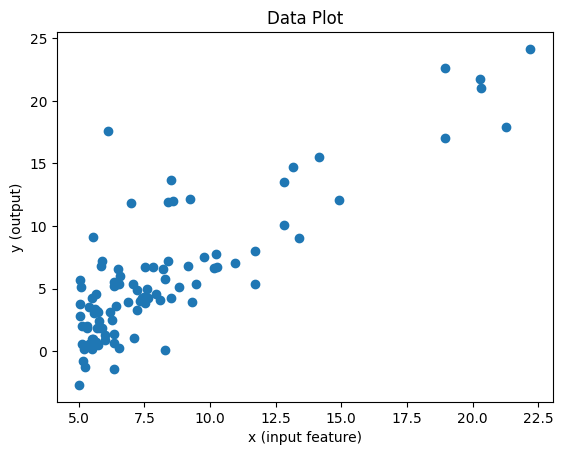

In [3]:
import matplotlib.pyplot as plt
# Visualize the data
plt.scatter(x, y)
plt.xlabel('x (input feature)')
plt.ylabel('y (output)')
plt.title('Data Plot')
plt.show()

## 2.Use Python to implement the Normal equation  

ans: The normal equation provides a closed-form solution, which is quick and exact for small datasets.

![Screenshot 2024-10-01 at 1.20.16 PM](https://hackmd.io/_uploads/BJ0UynYR0.png)

In [4]:
# Step 2: Implement Normal Equation
# reference: https://www.geeksforgeeks.org/ml-normal-equation-in-linear-regression/
# reference: https://dikshit18.medium.com/normal-equation-using-python-5993454fbb41
def normalEquation(x, y):
    xBias = np.c_[np.ones((len(x), 1)), x]  # Add bias term (column of 1s)
    theta = np.linalg.inv(xBias.T.dot(xBias)).dot(xBias.T).dot(y)
    return theta


thetaNormal = normalEquation(x, y)
print(f'Normal Equation Parameters: {thetaNormal}')

Normal Equation Parameters: [-3.89578088  1.19303364]


## 3.Use Python to implement the Gradient Descent using batch AND stochastic modes

Before implement gradient descent, we need to know the different between batch gradient descent and stochastic gradient descent.

Batch Gradient Descent: Parameters are updated after computing the gradient of the error with respect to the **entire training set**

Stochastic Gradient Descent: Parameters are updated after computing the gradient of the error with respect to a **single training example**

![Screenshot 2024-10-02 at 1.14.00 PM](https://hackmd.io/_uploads/SyLPkbi00.png)

In [5]:

# Step 3: Gradient Descent Implementation
# reference: https://stackoverflow.com/questions/17784587/gradient-descent-using-python-and-numpy
# Batch Gradient Descent
def batchGradientDescent(x, y, learningRate, nIterations):
    m = len(x) # Set m = len(x)
    xBias = np.c_[np.ones((len(x), 1)), x]  # Add bias term
    theta = np.random.randn(2)  # Random initialization of theta
    costHistory = []

    for _ in range(nIterations):
        gradients = 2/m * xBias.T.dot(xBias.dot(theta) - y)
        theta = theta - learningRate * gradients
        cost = (1/m) * np.sum((xBias.dot(theta) - y) ** 2)
        costHistory.append(cost)

    return theta, costHistory

In [6]:
# Stochastic Gradient Descent
# In the SGD we calculate everytime before we update result
# reference: https://www.geeksforgeeks.org/ml-stochastic-gradient-descent-sgd/
def stochasticGradientDescent(x, y, learningRate, nIterations):
    m = 1 # Set m = 1
    xBias = np.c_[np.ones((len(x), 1)), x]  # Add bias term
    theta = np.random.randn(2)  # Random initialization of theta
    costHistory = []

    for _ in range(nIterations):
        gradients = 2/m * xBias.T.dot(xBias.dot(theta) - y)
        theta = theta - learningRate * gradients
        cost = (1/m) * np.sum((xBias.dot(theta) - y) ** 2)
        costHistory.append(cost)
        
    return theta, costHistory

## 3.a Split dataset into 80% for training and 20% for testing. 

In [7]:
from sklearn.model_selection import train_test_split
# Step 4: Split Dataset (80% training, 20% testing)
XTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2)

## 3.b Plot MSE vs. iteration of each mode for both training set and testing set

ans: 
Batch gradient descent converges slower but provides a stable decrease in cost.

Stochastic gradient descent fluctuates more but can converge faster when carefully tuned.

thetaBatch: [-0.12043747  0.80939351]
costBatch: [np.float64(18.242243447821632), np.float64(12.373887144471503), np.float64(11.782424517227428), np.float64(11.710615469967077), np.float64(11.690051782366465), np.float64(11.674612544684663), np.float64(11.659756136894002), np.float64(11.645034925002683), np.float64(11.63040438006427), np.float64(11.615859666342288)]
thetaStochastic: [-6.36422892e+18 -6.33969214e+19]
costStochastic: [np.float64(24933524.977103468), np.float64(250131498380.0788), np.float64(2509404469776304.0), np.float64(2.517520126832751e+19), np.float64(2.5256620307108275e+23), np.float64(2.533830266294476e+27), np.float64(2.542024918742988e+31), np.float64(2.550246073491063e+35), np.float64(2.5584938162497003e+39), np.float64(2.566768233007102e+43)]


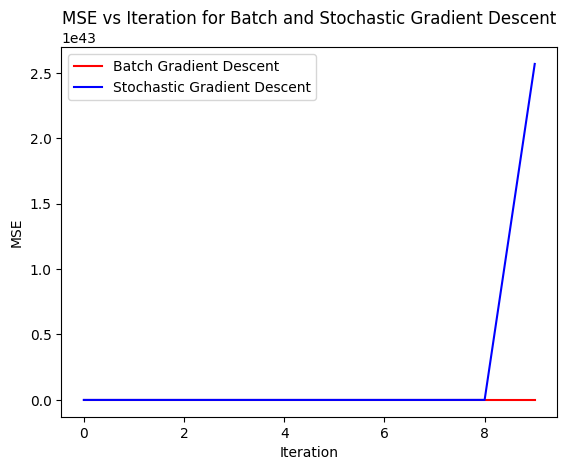

In [8]:
# Hyperparameters, and we can change the learningRate to check the result
learningRate = 0.008
nIterations = 10

# Train using Batch Gradient Descent
thetaBatch, costBatch = batchGradientDescent(
    XTrain, yTrain, learningRate, nIterations)
print("thetaBatch:", thetaBatch)
print("costBatch:", costBatch)
# Train using Stochastic Gradient Descent
thetaStochastic, costStochastic = stochasticGradientDescent(
    XTrain, yTrain, learningRate, nIterations)
print("thetaStochastic:", thetaStochastic)
print("costStochastic:", costStochastic)
# Plot the MSE vs Iteration for both methods
plt.plot(range(len(costBatch)), costBatch,
         color="red", label='Batch Gradient Descent')
plt.plot(range(len(costStochastic)), costStochastic,
         color="blue", label='Stochastic Gradient Descent')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.legend()
plt.title('MSE vs Iteration for Batch and Stochastic Gradient Descent')
plt.show()

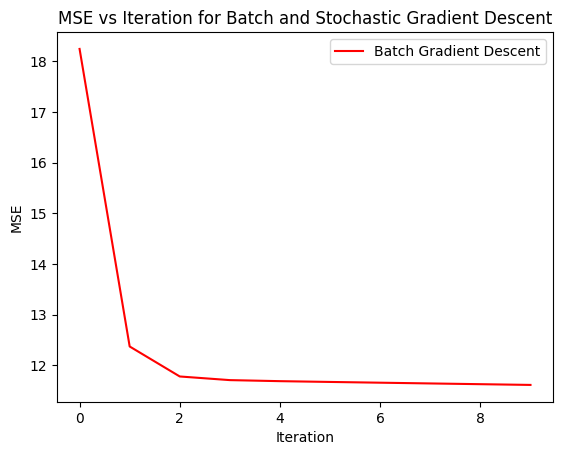

In [9]:
plt.plot(range(len(costBatch)), costBatch,
         color="red", label='Batch Gradient Descent')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.legend()
plt.title('MSE vs Iteration for Batch and Stochastic Gradient Descent')
plt.show()

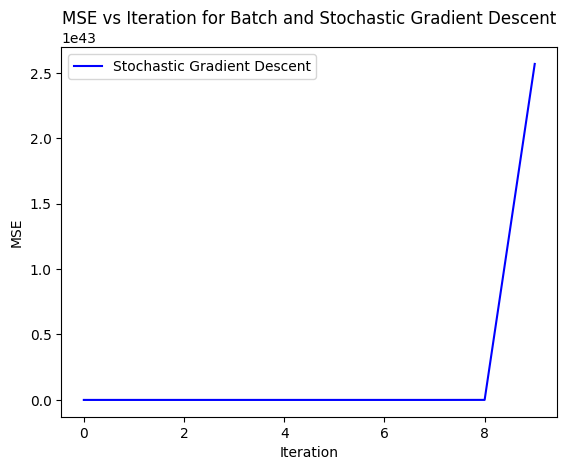

In [10]:
plt.plot(range(len(costStochastic)), costStochastic,
         color="blue", label='Stochastic Gradient Descent')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.legend()
plt.title('MSE vs Iteration for Batch and Stochastic Gradient Descent')
plt.show()

### 3.c Plot MSE of the testing set vs. learning rate (using 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01) and determine the best learning rate.  

ans: from the plot, we can get the 0.01 is the best learning rate for the lowest MSE.

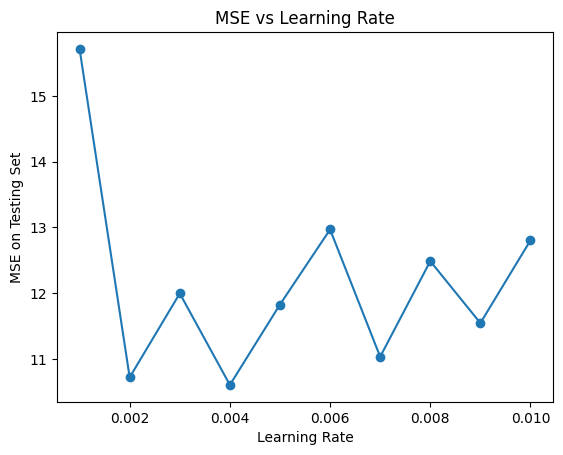

In [11]:
# Step 5: Plot MSE vs Learning Rate
learningRates = np.arange(0.001, 0.011, 0.001)
mseTest = []

for learningRate in learningRates:
    theta, _ = batchGradientDescent(XTrain, yTrain, learningRate, nIterations)
    xBiasTest = np.c_[np.ones((len(xTest), 1)), xTest]
    mse = (1/len(xTest)) * np.sum((xBiasTest.dot(theta) - yTest) ** 2)
    mseTest.append(mse)

plt.plot(learningRates, mseTest, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('MSE on Testing Set')
plt.title('MSE vs Learning Rate')
plt.show()